# MasVnrType 和 MasVnrArea的填充

砖石镶板种类

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datas/los_data.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
x=train.isnull().sum()

In [5]:
x[x>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

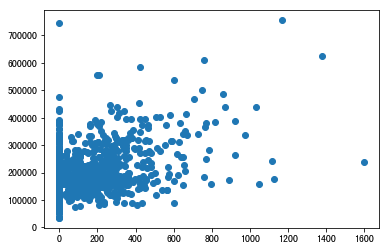

In [6]:
plt.scatter(train['MasVnrArea'], train['SalePrice'])

In [7]:
sns.plot(train['MasVnrArea'], train['SalePrice'])

AttributeError: module 'seaborn' has no attribute 'plot'

In [8]:
train['MasVnrArea'].corr(train['SalePrice'])

0.4774930470957163

In [9]:
train['MasVnrType'].corr(train['SalePrice'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

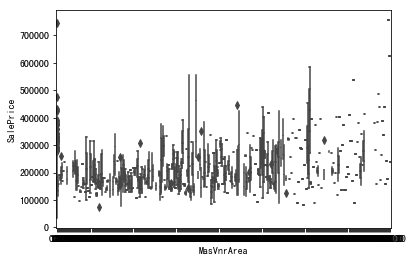

In [10]:
sns.boxplot('MasVnrArea', 'SalePrice', data=train)

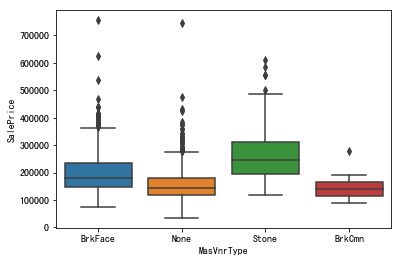

In [11]:
sns.boxplot('MasVnrType', 'SalePrice', data=train)

In [12]:
train.groupby(['MasVnrType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,9,15,15,0,15,15,15,...,15,0,7,2,15,15,15,15,15,15
BrkFace,445,445,445,339,445,445,10,445,445,445,...,445,2,80,11,445,445,445,445,445,445
None,864,864,864,728,864,864,77,864,864,864,...,864,4,188,40,864,864,864,864,864,864
Stone,128,128,128,119,128,128,3,128,128,128,...,128,1,6,1,128,128,128,128,128,128


In [13]:
train[train.MasVnrType=='None'][['MasVnrType', 'MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


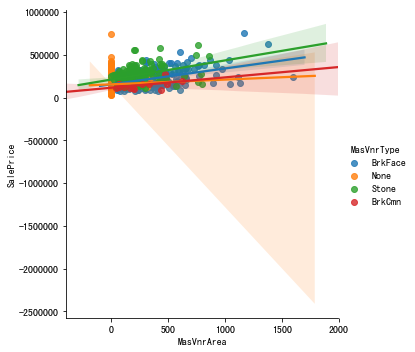

In [14]:
# 有回归
sns.lmplot('MasVnrArea', 'SalePrice', hue='MasVnrType', data=train)

In [15]:
filter=train['MasVnrArea'].isnull()

In [16]:
train.MasVnrArea[filter]=0.0

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
filter=train['MasVnrType'].isnull()
train.MasVnrType[filter]='None'

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 后续在EDA的特征工程中，可以使用如下填充办法：
1. 分类进行预测MasVnrType，使用回归MasVnrAre



LotFrontage      259
Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


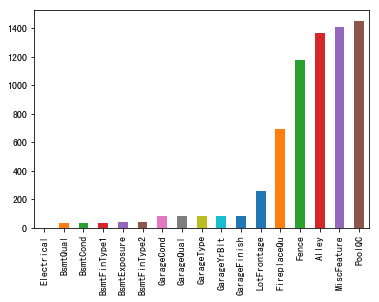

In [20]:
getNullCount()

## 查看空值情况

In [19]:
def getNullCount():
    x = train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()  

## 3. Electrical的填充

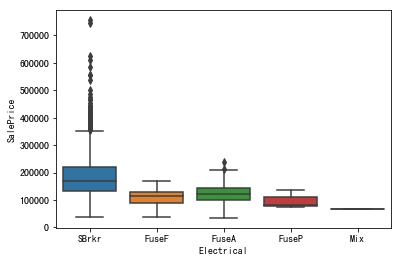

In [21]:
# 先看和目标的相关性
sns.boxplot('Electrical', 'SalePrice', data=train)

In [22]:
train.groupby('Electrical').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,80,94,94,12,94,94,94,...,94,0,23,2,94,94,94,94,94,94
FuseF,27,27,27,25,27,27,4,27,27,27,...,27,0,2,0,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,3,0,0,0,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
SBrkr,1334,1334,1334,1091,1334,1334,73,1334,1334,1334,...,1334,7,256,52,1334,1334,1334,1334,1334,1334


In [23]:
filter=train['Electrical'].isnull()
train.Electrical[filter]='SBrkr'

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LotFrontage      259
Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


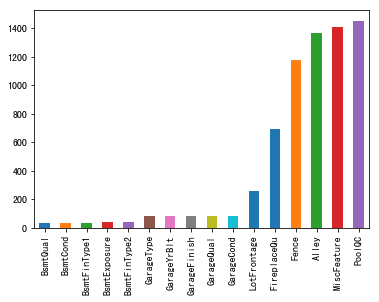

In [24]:
getNullCount()

## 4. Alley 的填充

EDA 后半段考虑删掉

80%以上的空值，可以删除了

In [25]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [26]:
# train['Alley'].sort_values()
train['Alley'].value_counts()
# train['Alley'].value_counts() 与groupby().count()效果一样？

Grvl    50
Pave    41
Name: Alley, dtype: int64

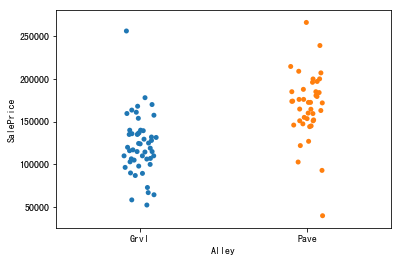

In [27]:
sns.stripplot('Alley', 'SalePrice', data=train)

In [28]:
train['Alley']=train['Alley'].fillna('None')

LotFrontage      259
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


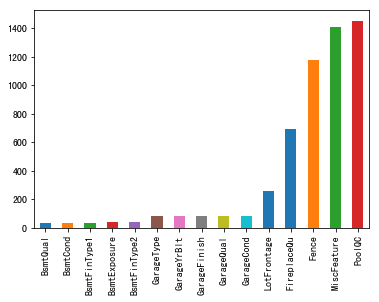

In [29]:
getNullCount()

## BaseMent 群填充
完整的关于Basement的类

分析重要性



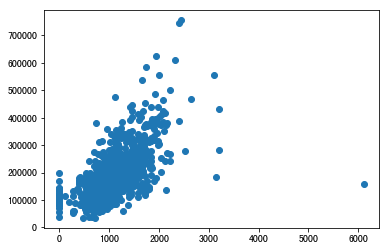

In [30]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

In [31]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN           0   
39        NaN      NaN          NaN          NaN          NaN           0   
90        NaN      NaN          NaN          NaN          NaN           0   
102       NaN      NaN          NaN          NaN          NaN           0   
156       NaN      NaN          NaN          NaN          NaN           0   
182       NaN      NaN          NaN          NaN          NaN           0   
259       NaN      NaN          NaN          NaN          NaN           0   
342       NaN      NaN          NaN          NaN          NaN           0   
362       NaN      NaN          NaN          NaN          NaN           0   
371       NaN      NaN          NaN          NaN          NaN           0   
392       NaN      NaN          NaN          NaN          NaN           0   
520       NaN      NaN          NaN          NaN          NaN           0   

In [32]:
train[train.BsmtCond=='NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [33]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna('None')

LotFrontage      259
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


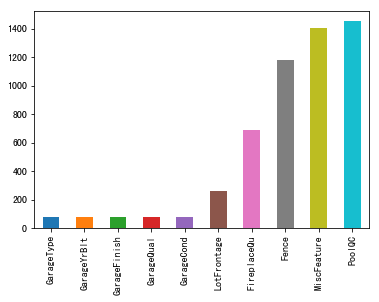

In [34]:
getNullCount()

## FireplaceQu填充

火炉

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


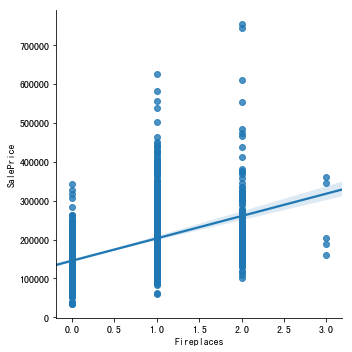

In [35]:
sns.lmplot('Fireplaces', 'SalePrice', data=train)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


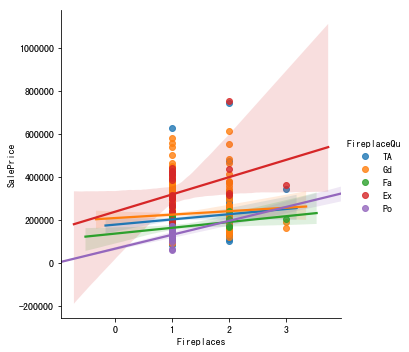

In [36]:
sns.lmplot('Fireplaces', 'SalePrice', data=train, hue='FireplaceQu')

In [37]:
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


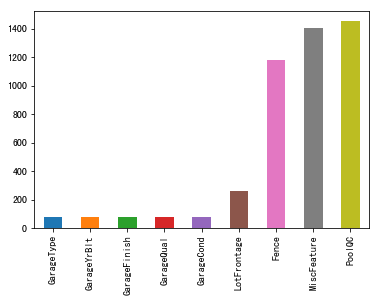

In [38]:
getNullCount()

## Carage 列群填充

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


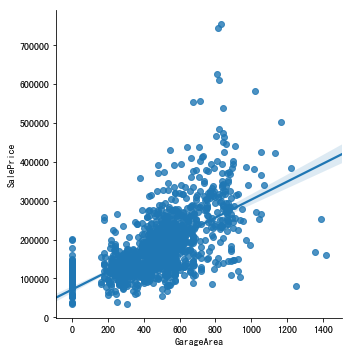

In [39]:
sns.lmplot('GarageArea', 'SalePrice', data=train)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


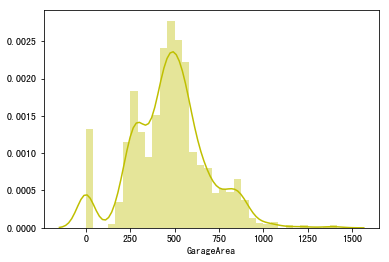

In [40]:
# 分布，拟正太分布
sns.distplot(train['GarageArea'], color='y', kde=True)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


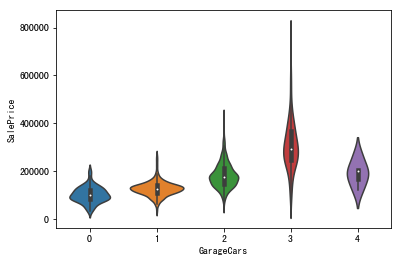

In [41]:
sns.violinplot(train['GarageCars'], train['SalePrice'])

In [42]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [43]:
train[garage_cols][train['GarageType'].isnull()].head()
# print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0


In [44]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col]=train[col].fillna('None')
    else:
        train[col]=train[col].fillna(0)

LotFrontage     259
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


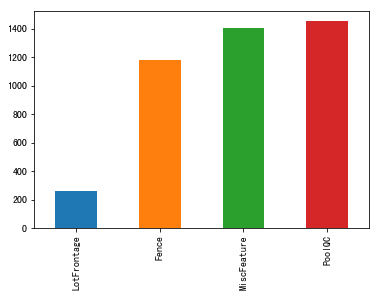

In [45]:
getNullCount()

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


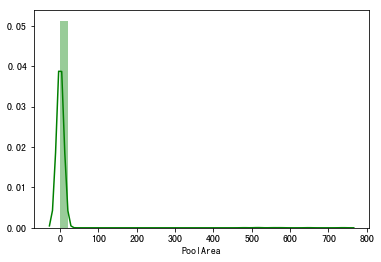

In [46]:
sns.distplot(train['PoolArea'], color='g', kde=True)

In [47]:
train.PoolQC=train['PoolQC'].fillna('None')

LotFrontage     259
Fence          1179
MiscFeature    1406
dtype: int64


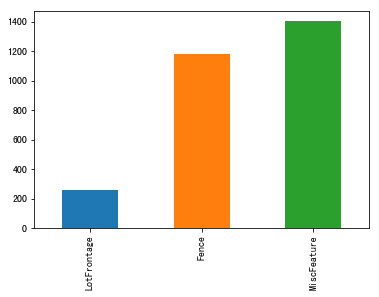

In [48]:
getNullCount()

In [49]:
train.LotFrontage = 

SyntaxError: invalid syntax (<ipython-input-49-f3af28b83e16>, line 1)

## Fence填充

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


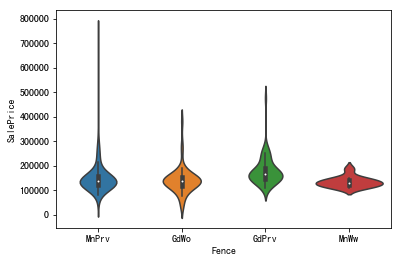

In [50]:
sns.violinplot(train['Fence'], train['SalePrice'])

总共有5个类型，然而可以统计出来的类型以后在那个只有4类



In [51]:
train.Fence = train['Fence'].fillna('None')

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


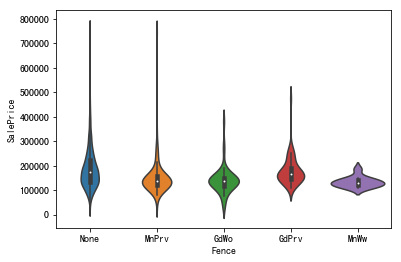

In [52]:
# 回看填充后的数据 与 SalePrice的关系
sns.violinplot(train['Fence'], train['SalePrice'])

LotFrontage     259
MiscFeature    1406
dtype: int64


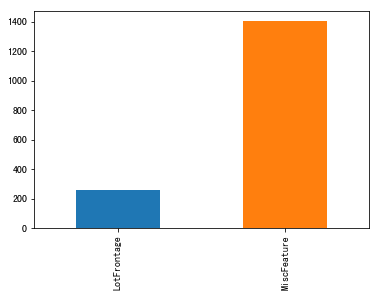

In [53]:
getNullCount()

## MiscFeature填充

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


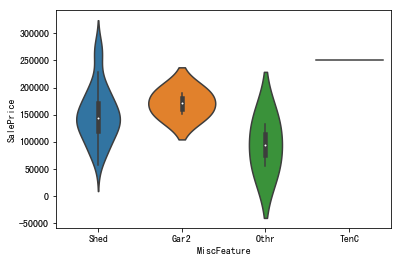

In [54]:
sns.violinplot(train['MiscFeature'], train['SalePrice'])

因为MiscFeature本来有5类，因此可以断定

In [55]:
train.MiscFeature = train['MiscFeature'].fillna('None')

LotFrontage    259
dtype: int64


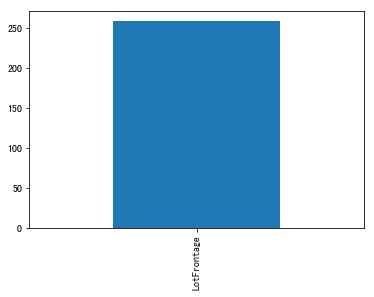

In [56]:
getNullCount()

In [57]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [58]:
filter=train['LotFrontage'].isnull()
train.LotFrontage[filter]=0.6*train.SqrtLotArea[filter]

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
filter=train['LotFrontage'].isnull()
filter.sum()

0

In [60]:
getNullCount()

Series([], dtype: int64)


TypeError: Empty 'DataFrame': no numeric data to plot

## 数据集的准备

Kaggle比赛，测试集数据也会填充

底层各有优缺点，

仲裁者，模型融合

好的基石，数据，数据决定上限

上面都是 ~ 手法

In [61]:
y = train['SalePrice']

In [62]:
train1 = train.drop(['Id', 'SalePrice'], axis=1)

In [63]:
X = pd.get_dummies(train1).reset_index(drop=True)

In [64]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
# 内容全部数字化了
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=123)

## 基础线性回归



生成对抗网络，生成、对抗网络

deep state

输入噪声，生成图片

对抗模型：图片分类

来自`银行和印假钞`模型——画家

最早的对抗模型

评判，

知道银行柜员，不能识别，

来来回回对抗模型

生成假钞，做假钞的能力也很强

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
lm=LinearRegression()

In [68]:
p=lm.fit(X_train, y_train)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [69]:
lm.score(X_test, y_test)

0.8990719725518264

In [70]:
pred=lm.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))

0.12627809622154218

In [72]:
np.sqrt(mean_squared_error(y_test, pred))

24973.913406553667

In [73]:
def benchmark(model):
    pred = model.predict(X_test)
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    return logrmse

In [74]:
benchmark(lm)

0.12627809622154218

## 数据预处理 Preprocessing

In [75]:
from sklearn.pipeline import make_pipeline

In [76]:
from sklearn.preprocessing import RobustScaler

In [79]:
lm_model = make_pipeline(RobustScaler(), LinearRegression())

In [80]:
lm_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [81]:
# 评测模型
benchmark(lm_model)

0.12627809622156963

## RidegeRegression

朴素的Ridge回归

In [83]:
from sklearn.linear_model import Ridge

In [97]:
ridge_model = Ridge(alpha=0.1)

In [98]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
benchmark(ridge_model)

0.12658320875065016

## 朴素的Ridge回归

In [100]:
ridge_model_pipe=make_pipeline(RobustScaler(), Ridge(alpha=0.1))

In [102]:
ridge_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [103]:
benchmark(ridge_model_pipe)

0.12658566764241674

## 带有CV的回归

cross view data

In [104]:
from sklearn.model_selection import KFold

In [105]:
kfolds=KFold(n_splits=10, shuffle=True, random_state=123)

In [106]:
from sklearn.linear_model import RidgeCV

In [112]:
r_alphas=[0.01, 0.1, 1, 3, 5, 7, 10, 100]

In [113]:
ridge_model_cv=make_pipeline(RobustScaler(), RidgeCV(alphas=r_alphas, cv=kfolds))

In [110]:
# RidgeCV()

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [114]:
ridge_model_cv.fit(X_train, y_train)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 1.e+02]),
    cv=KFold(n_splits=10, random_state=123, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [115]:
benchmark(ridge_model_cv)

0.12385966794851837

In [116]:
def benchmark2(model, X_test, y_test):
    pred=model.predict(X_test)
    if pred[pred<0.].shape[0]>0:
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(y_test, pred))
    lrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    
    print('RMSE:', rmse)
    print('LRMSE:', lrmse)

In [117]:
benchmark2(ridge_model_cv, X_test, y_test)

RMSE: 26907.89401651115
LRMSE: 0.12385966794851837


In [118]:
r_alphas=[.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

In [135]:
def ridge_train_test(alpha):
    m = make_pipeline(RobustScaler(), RidgeCV(alphas=[alpha], cv=kfolds))
    m.fit(X_train, y_train)
    benchmark2(m, X_test, y_test)
    lrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return lrmse

In [140]:
ridge_train_test(.0001)

RMSE: 24973.969249083013
LRMSE: 0.1262790457452543


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.12627809622154218

In [137]:
# 要写很多很多野代码
scores=[]
for k in r_alphas:
    scores.append(ridge_train_test(k))

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 24973.969249083013
LRMSE: 0.1262790457452543
RMSE: 24974.08081833018
LRMSE: 0.1262809158005962


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 24974.19224303887
LRMSE: 0.12628274791874755


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 24974.303534382863
LRMSE: 0.1262845429471877
RMSE: 24974.414703859817
LRMSE: 0.1262863017144322


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 24979.52813437873
LRMSE: 0.1263387054144408
RMSE: 25012.204406895868
LRMSE: 0.12641709913943744


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 25072.955925339724
LRMSE: 0.12658566764241674


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 25328.50195034772
LRMSE: 0.12762387547257215


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE: 25776.231528192795
LRMSE: 0.129933862668037
RMSE: 26017.00830435277
LRMSE: 0.1313335955487694
RMSE: 26002.202070522937
LRMSE: 0.1310427758353865
RMSE: 25890.56856743901
LRMSE: 0.1297114290664526
RMSE: 25829.487235208784
LRMSE: 0.12861148518191526
RMSE: 25816.158578357015
LRMSE: 0.1277569725395535
RMSE: 25873.84358516783
LRMSE: 0.12652048146318895
RMSE: 26130.63901498297
LRMSE: 0.12506392340075106
RMSE: 26283.503890921842
LRMSE: 0.12462399114535536
RMSE: 26440.645901425924
LRMSE: 0.12430803900379396
RMSE: 26598.292894871793
LRMSE: 0.12408770831058384


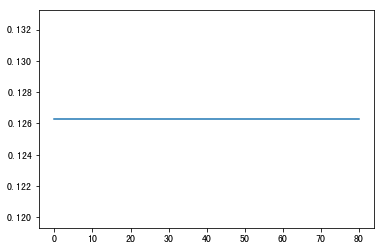

In [139]:
plt.plot(r_alphas, scores)